# **Anomaly Detection for Loyalty & Promotion Systems**
---
## **Kyanon Digital**
### **Abraham Ighalo - Data Engineering Intern**
#### **June 30th**



**Loyalty programs:**
* Loyalty programs are a customer rewards system offered by businesses (banks, retailers, airlines, etc.) to encourage repeat purchases or engagement. They reward customers for using their credit cards by giving them points, cashback, miles, or other incentives based on their transaction activity.

---

**Objective**
* A loyalty program is a reward system built around credit card transactions and the goal is to ensure it's not being abused by detecting unusual patterns of reward accumulation or redemption using anomaly detection techniques.



# **Data Gathering**

In [83]:
import pandas as pd

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

In [84]:

import kagglehub

path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')


Path to dataset files: /kaggle/input/creditcardfraud


In [85]:
df.shape

(284807, 31)

In [86]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **Descriptive Analysis**

In [87]:
df.tail(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.41465,0.48618,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.30262,-0.660377,0.16743,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.0,0




> *There are 86,400 seconds in a day. The last row having 172,792 seconds confirms that the transactions happened in two days*



In [88]:
# Distribution of anomalies in the dataset
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [89]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000



> Amount (euros) min spent is 25,691 euros max spent is **0** euros the mean spent is **88** euros







In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [91]:
df.isnull().sum().sum() #checks for null values

np.int64(0)

# **Machine Learning Experimentation and Evaluation**

In [92]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import lightgbm as lgb
import xgboost as xgb

In [93]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


## **Feature Engineering**

In [94]:
# Simulate reward_points 5% per 1 euro
df['reward_points'] = df['Amount']*0.05

In [95]:
#simulate users for behavioral analytics
np.random.seed(0)
df['user_id'] = np.random.randint(0,1000,df.shape[0])

In [96]:
seconds_per_day = 86400

df['time_of_day_seconds'] = df['Time'] % seconds_per_day
df['hour_24'] = df['time_of_day_seconds'] // 3600
df['minute_24'] = (df['time_of_day_seconds'] % 3600) // 60
df['second_24'] = df['time_of_day_seconds'] % 60

In [97]:
# Step 3: Convert to timedelta for AM/PM formatting
df['time_delta'] = pd.to_timedelta(df['Time'], unit='s')
base_date = pd.to_datetime('2025-01-01')
df['timestamp'] = base_date + df['time_delta']
df['time_ampm'] = df['timestamp'].dt.strftime('%I:%M %p')
df['days_elapsed'] = df['timestamp'].dt.day - base_date.day


In [98]:
df[df['days_elapsed']== 0].head(1) #last transaction for the first day

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,reward_points,user_id,time_of_day_seconds,hour_24,minute_24,second_24,time_delta,timestamp,time_ampm,days_elapsed
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.5516,-0.617801,-0.99139,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,7.481,684,0.0,0.0,0.0,0.0,0 days,2025-01-01,12:00 AM,0


In [99]:
df[(df['hour_24'] == 12) & (df['Class'] == 1)].tail(4)    # last transaction for the second day

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,reward_points,user_id,time_of_day_seconds,hour_24,minute_24,second_24,time_delta,timestamp,time_ampm,days_elapsed
195383,131024.0,0.469750,-1.237555,-1.767341,4.833490,-0.268715,-0.512760,1.140149,-0.341273,-1.046351,0.085662,-0.000121,-0.054381,0.736192,-2.306645,-0.464003,1.672723,1.165737,0.561323,-2.300798,1.277315,0.303905,-0.647075,-0.373014,0.260801,-0.496566,-0.245973,-0.117858,0.144774,723.21,1,36.1605,562,44624.0,12.0,23.0,44.0,1 days 12:23:44,2025-01-02 12:23:44,12:23 PM,1
197586,132086.0,-0.361428,1.133472,-2.971360,-0.283073,0.371452,-0.574680,4.031513,-0.934398,-0.768255,-2.248115,-0.482409,-0.690550,0.181275,-2.372552,-0.006868,0.146399,1.759314,1.083040,-0.391048,-0.025862,0.110815,0.563861,-0.408436,-0.880079,1.408392,-0.137402,-0.001250,-0.182751,480.72,1,24.0360,22,45686.0,12.0,41.0,26.0,1 days 12:41:26,2025-01-02 12:41:26,12:41 PM,1
198868,132688.0,0.432554,1.861373,-4.310353,2.448080,4.574094,-2.979912,-2.792379,-2.719867,-0.276704,-2.314747,2.222960,-0.407550,-1.652312,-5.871438,-0.427647,1.679873,5.540865,3.207637,-0.559480,0.318853,-1.384477,-0.348904,-3.979948,-0.828156,-2.419446,-0.767070,0.387039,0.319402,1.00,1,0.0500,711,46288.0,12.0,51.0,28.0,1 days 12:51:28,2025-01-02 12:51:28,12:51 PM,1
199896,133184.0,-1.212682,-2.484824,-6.397186,3.670562,-0.863375,-1.855855,1.017732,-0.544704,-1.703378,-3.739659,1.738124,-2.844449,0.765864,-4.799737,-0.011335,-2.693168,-3.166955,-1.067800,-0.559132,2.908374,1.396872,0.092073,-1.492882,-0.204227,0.532511,-0.293871,0.212663,0.431095,1335.00,1,66.7500,121,46784.0,12.0,59.0,44.0,1 days 12:59:44,2025-01-02 12:59:44,12:59 PM,1


## **Visualizations**

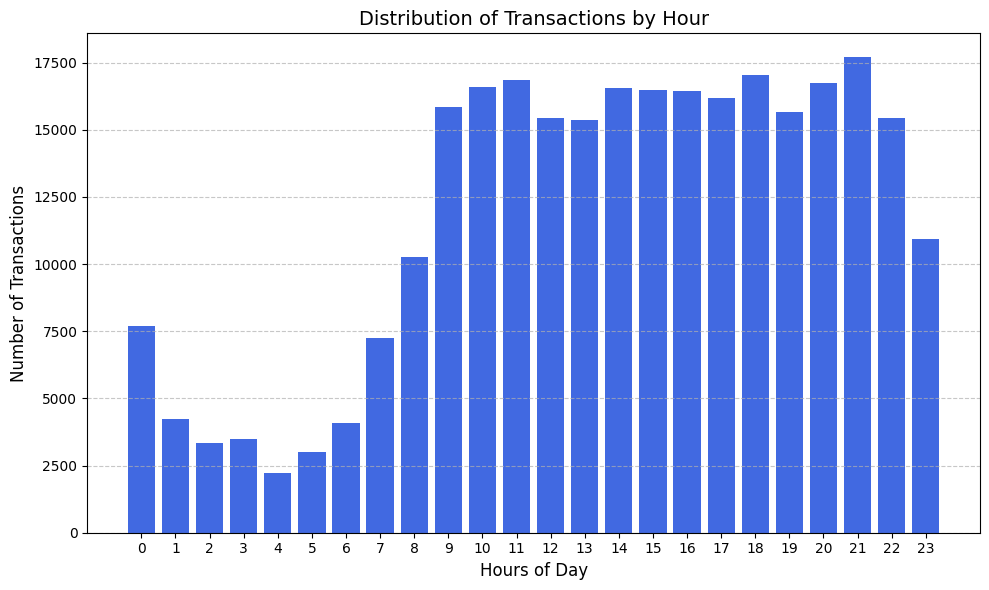

In [100]:
hour_counts = df['hour_24'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(hour_counts.index, hour_counts.values, color='royalblue',
        #marker = 'o'
        )

# Labels and title
plt.title('Distribution of Transactions by Hour', fontsize=14)
plt.xlabel('Hours of Day', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(range(0, 24))  # make sure we show every hour
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show it
plt.tight_layout()
plt.show()

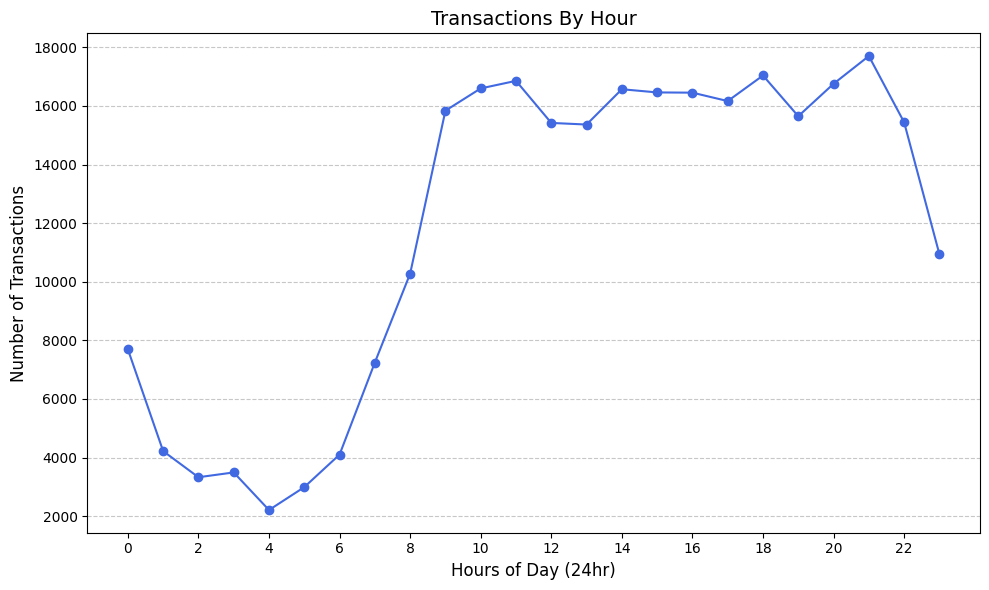

In [101]:
hour_counts = df['hour_24'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(hour_counts.index, hour_counts.values, color='royalblue', marker = 'o')

# Labels and title
plt.title('Transactions By Hour', fontsize=14)
plt.xlabel('Hours of Day (24hr)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(range(0, 24, 2))  # make sure we show every hour
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show it
plt.tight_layout()
plt.show()



> This shows that most transactions happened at 9pm



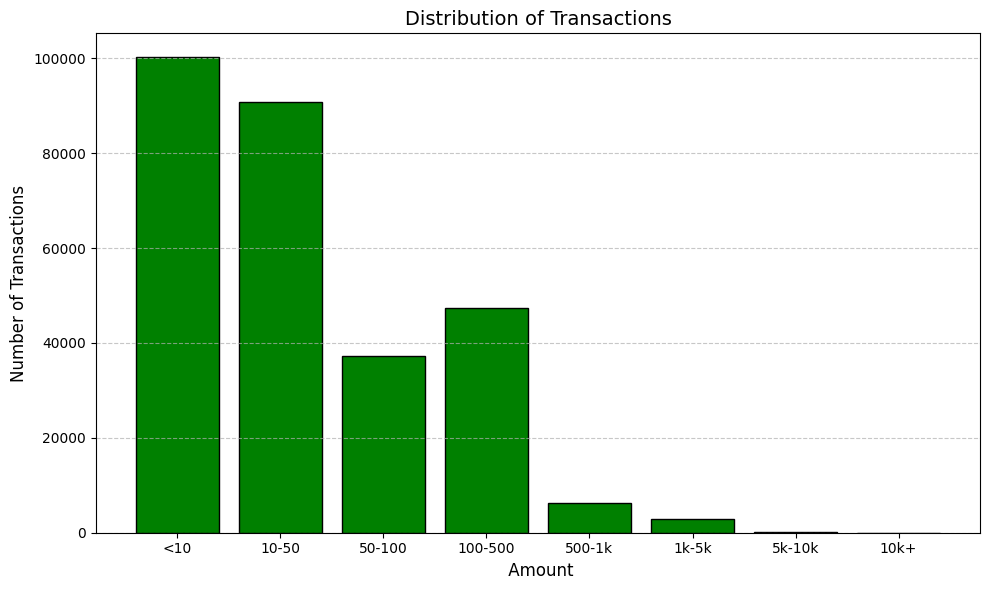

In [102]:
bins = [0, 10, 50, 100, 500, 1000, 5000, 10000, df['Amount'].max()]
labels = ['<10', '10-50', '50-100', '100-500', '500-1k', '1k-5k', '5k-10k', '10k+']

df['amount_bin'] = pd.cut(df['Amount'], bins=bins, labels=labels, include_lowest=True)
amount_counts = df['amount_bin'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(amount_counts.index, amount_counts.values, color='green', edgecolor='black')

plt.title('Distribution of Transactions', fontsize=14)
plt.xlabel(' Amount', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()




> Majority of the users spend less than 500 Euros



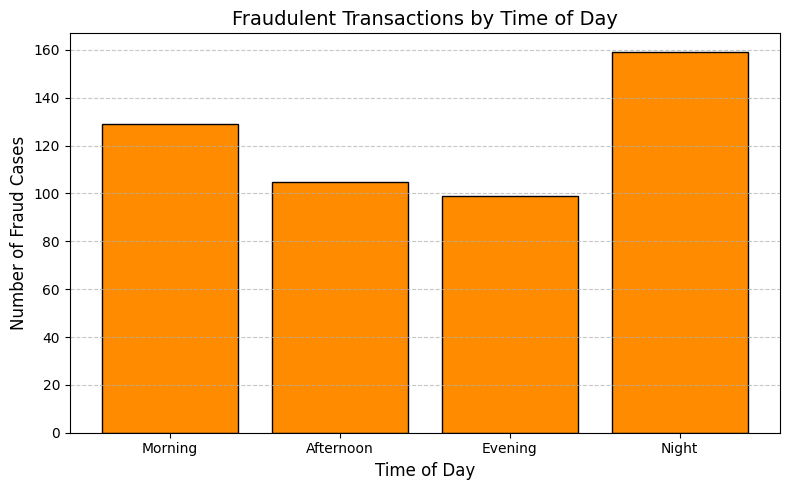

In [103]:
def get_time_period(hour):
    if 5 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 16:
        return 'Afternoon'
    elif 17 <= hour <= 20:
        return 'Evening'
    else:
        return 'Night'

df['time_period'] = df['hour_24'].apply(get_time_period)

fraud_df = df[df['Class'] == 1]
fraud_period_counts = fraud_df['time_period'].value_counts().reindex(['Morning', 'Afternoon', 'Evening', 'Night'])

plt.figure(figsize=(8, 5))
plt.bar(fraud_period_counts.index, fraud_period_counts.values, color='darkorange', edgecolor='black')

plt.title('Fraudulent Transactions by Time of Day', fontsize=14)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Number of Fraud Cases', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## **Supervised Machine Learning**



In [104]:
df_ml = df.copy()
df_ml.drop(columns=['time_delta','timestamp','time_ampm','days_elapsed','amount_bin','user_id','time_of_day_seconds','hour_24','minute_24','second_24'],inplace=True)

In [105]:
# Scale only the 'Amount' and 'Time' columns
scaler = StandardScaler()
df_ml[['scaled_amount', 'scaled_time','scaled_points']] = scaler.fit_transform(df_ml[['Amount','Time','reward_points']])
df_ml = df_ml.drop(columns=['Amount','Time','reward_points'])

In [106]:
df_ml.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,time_period,scaled_amount,scaled_time,scaled_points
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,Night,-0.350151,1.641931,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,Night,-0.254117,1.641952,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,Night,-0.081839,1.641974,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,Night,-0.313249,1.641974,-0.313249
284806,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,0,Night,0.514355,1.642058,0.514355


In [107]:
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df_ml[['time_period']])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['time_period']),index=df_ml.index
)


df_ml = pd.concat([df_ml.drop(columns=['time_period']), encoded_df], axis=1)


In [108]:
x = df_ml.drop(columns=['Class'])
y = df_ml['Class']

In [109]:
df_ml.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time,scaled_points,time_period_Afternoon,time_period_Evening,time_period_Morning,time_period_Night
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583,0.244964,0.0,0.0,0.0,1.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583,-0.342475,0.0,0.0,0.0,1.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562,1.160686,0.0,0.0,0.0,1.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562,0.140534,0.0,0.0,0.0,1.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541,-0.073403,0.0,0.0,0.0,1.0


In [110]:
# Train_Test Split (stratified to preserve class imbalance)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## **Random Forest Classifier**

In [111]:
# Train the model (class balancing)
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Prediction
y_pred_rf = rf.predict(X_test)

# Prediction (threshold fine-tuning)
y_probs = rf.predict_proba(X_test)[:, 1]  # Get probabilities for class 1 (fraud)
threshold = 0.3  # standard is 0.5, go lower if you want higher recall
y_pred_rf = (y_probs >= threshold).astype(int)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.84      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56858     6]
 [   16    82]]
ROC AUC Score: 0.9581918691787351


## LightGBM

In [113]:
lgb_model = lgb.LGBMClassifier(
    objective='binary',
    class_weight='balanced',
    boosting_type='gbdt',
    n_estimators=1000,
    learning_rate=0.05,
    random_state=42
)

lgb_model.fit(X_train, y_train)

# Prediction
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate the model
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgb))
print("ROC AUC Score:", roc_auc_score(y_test, lgb_model.predict_proba(X_test)[:,1]))

[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.223969 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7913
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

## XGBoost

In [114]:
# Train the model
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1]))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.80      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56862     2]
 [   20    78]]
ROC AUC Score: 0.9864896049866204


## **Comparative Analysis**

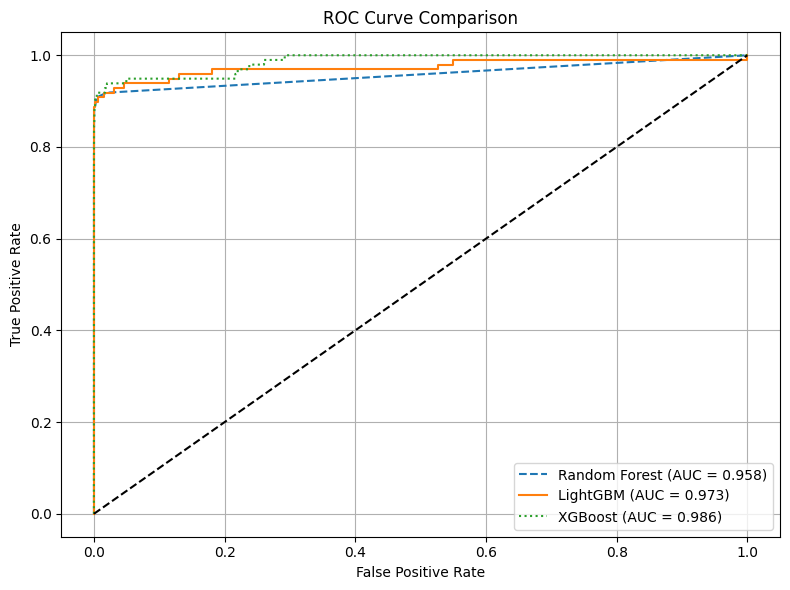

In [122]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
rf_probs = rf.predict_proba(X_test)[:, 1]
lgb_probs = lgb_model.predict_proba(X_test)[:, 1]
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curves and AUCs
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_lgb, tpr_lgb, _ = roc_curve(y_test, lgb_probs)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.3f})', linestyle='--')
plt.plot(fpr_lgb, tpr_lgb, label=f'LightGBM (AUC = {roc_auc_lgb:.3f})', linestyle='-')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.3f})', linestyle=':')

# Plot the diagonal (no-skill classifier)
plt.plot([0, 1], [0, 1], 'k--')

# Chart f
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


# Unsupervised Machine learning

Unlike supervised machine learning we fit only x and then after predicting we check using y to determine how well our model guessed


## **Isolation Forest**

In [136]:
model = IsolationForest(
    n_estimators=100,
    contamination=0.0079,
    max_samples= 1000,
    random_state=42
)
model.fit(X_train)

y_pred = model.predict(X_test)


y_pred = [1 if val == -1 else 0 for val in y_pred]
print(classification_report(y_test,y_pred))
print("Isolation Forest ROC AUC Score:", roc_auc_score(y_test, -model.decision_function(X_test)))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.12      0.59      0.21        98

    accuracy                           0.99     56962
   macro avg       0.56      0.79      0.60     56962
weighted avg       1.00      0.99      0.99     56962

Isolation Forest ROC AUC Score: 0.9523449433234182


## **Local Outlier Factor**

In [137]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.0079)

# NOTE: LOF does prediction during fit
y_pred_lof = lof.fit_predict(X_test)  # directly on test data

# Convert LOF output (-1 = anomaly) to your format (1 = anomaly)
y_pred_lof = [1 if val == -1 else 0 for val in y_pred_lof]

print(" Local Outlier Factor:")
print(classification_report(y_test, y_pred_lof))
print("Local Outlier Factor ROC AUC Score:", roc_auc_score(y_test, -lof.negative_outlier_factor_))


 Local Outlier Factor:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.02      0.09      0.03        98

    accuracy                           0.99     56962
   macro avg       0.51      0.54      0.51     56962
weighted avg       1.00      0.99      0.99     56962

Local Outlier Factor ROC AUC Score: 0.6719503677948389


One Class SVM

In [138]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.0079)
ocsvm.fit(X_train_scaled)

y_pred_ocsvm = ocsvm.predict(X_test_scaled)
y_pred_ocsvm = [1 if val == -1 else 0 for val in y_pred_ocsvm]

print(" One-Class SVM:")
print(classification_report(y_test, y_pred_ocsvm))
print("One-Class SVM ROC AUC Score:", roc_auc_score(y_test, -ocsvm.decision_function(X_test_scaled)))


 One-Class SVM:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.08      0.53      0.14        98

    accuracy                           0.99     56962
   macro avg       0.54      0.76      0.57     56962
weighted avg       1.00      0.99      0.99     56962

One-Class SVM ROC AUC Score: 0.9483466818072193


## **DBSCAN**

In [139]:
from sklearn.cluster import DBSCAN

X_combined_scaled = scaler.fit_transform(X_test)

dbscan = DBSCAN(eps=1.2, min_samples=5)
labels = dbscan.fit_predict(X_combined_scaled)

y_pred_dbscan = [1 if label == -1 else 0 for label in labels]

print(" DBSCAN:")
print(classification_report(y_test, y_pred_dbscan))
print("DBSCAN ROC AUC Score:", roc_auc_score(y_test, y_pred_dbscan))


 DBSCAN:
              precision    recall  f1-score   support

           0       1.00      0.24      0.39     56864
           1       0.00      1.00      0.00        98

    accuracy                           0.24     56962
   macro avg       0.50      0.62      0.20     56962
weighted avg       1.00      0.24      0.39     56962

DBSCAN ROC AUC Score: 0.6214564575126618


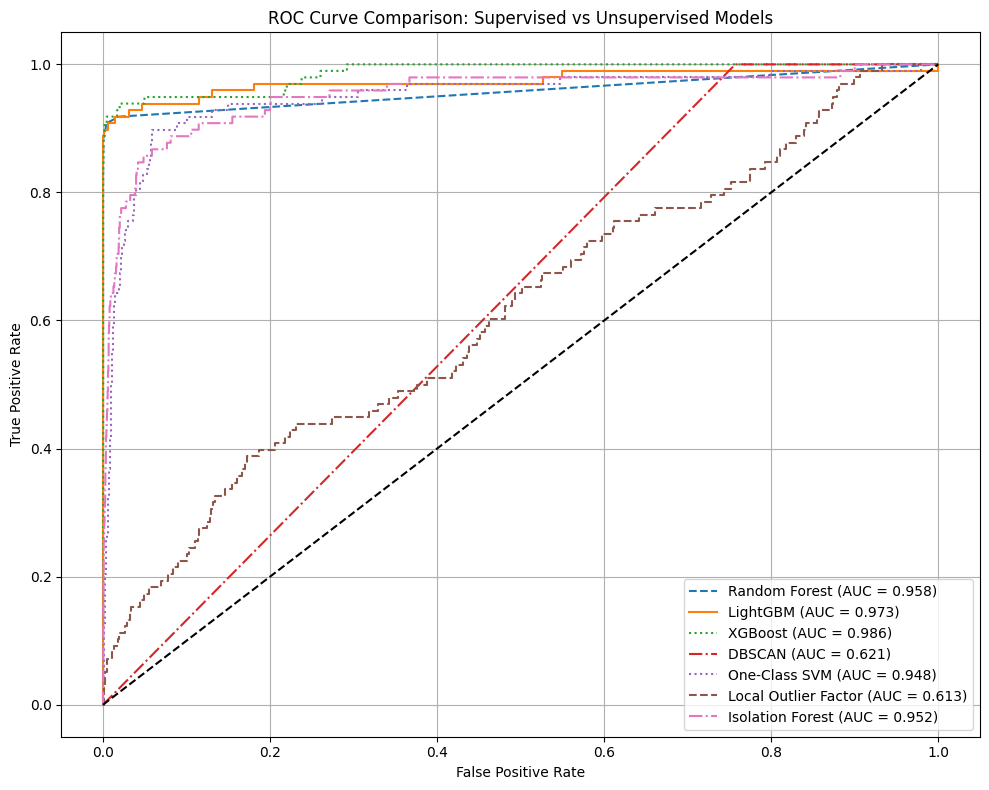

In [142]:
# --- Supervised models ---
rf_probs = rf.predict_proba(X_test)[:, 1]
lgb_probs = lgb_model.predict_proba(X_test)[:, 1]
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# --- Unsupervised anomaly detection scores ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=5)
X_test_scaled_for_dbscan = scaler.fit_transform(X_test)
labels_dbscan = dbscan.fit_predict(X_test_scaled_for_dbscan)
y_scores_dbscan = [-label for label in labels_dbscan]

# One-Class SVM
ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.0079)
ocsvm.fit(X_train_scaled)
y_scores_ocsvm = -ocsvm.decision_function(X_test_scaled)

# Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.0079)
y_pred_lof = lof.fit_predict(X_test_scaled)
y_scores_lof = -lof.negative_outlier_factor_

# Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.0079, max_samples=1000, random_state=42)
iso_forest.fit(X_train_scaled)
y_scores_iso = -iso_forest.decision_function(X_test_scaled)

# --- Compute ROC curves for supervised models ---
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_lgb, tpr_lgb, _ = roc_curve(y_test, lgb_probs)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# --- Compute ROC curves for unsupervised models ---
fpr_dbscan, tpr_dbscan, _ = roc_curve(y_test, y_scores_dbscan)
roc_auc_dbscan = auc(fpr_dbscan, tpr_dbscan)

fpr_ocsvm, tpr_ocsvm, _ = roc_curve(y_test, y_scores_ocsvm)
roc_auc_ocsvm = auc(fpr_ocsvm, tpr_ocsvm)

fpr_lof, tpr_lof, _ = roc_curve(y_test, y_scores_lof)
roc_auc_lof = auc(fpr_lof, tpr_lof)

fpr_iso, tpr_iso, _ = roc_curve(y_test, y_scores_iso)
roc_auc_iso = auc(fpr_iso, tpr_iso)

# --- Plot all ROC curves ---
plt.figure(figsize=(10, 8))

plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.3f})', linestyle='--')
plt.plot(fpr_lgb, tpr_lgb, label=f'LightGBM (AUC = {roc_auc_lgb:.3f})', linestyle='-')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.3f})', linestyle=':')

plt.plot(fpr_dbscan, tpr_dbscan, label=f'DBSCAN (AUC = {roc_auc_dbscan:.3f})', linestyle='-.')
plt.plot(fpr_ocsvm, tpr_ocsvm, label=f'One-Class SVM (AUC = {roc_auc_ocsvm:.3f})', linestyle=':')
plt.plot(fpr_lof, tpr_lof, label=f'Local Outlier Factor (AUC = {roc_auc_lof:.3f})', linestyle='--')
plt.plot(fpr_iso, tpr_iso, label=f'Isolation Forest (AUC = {roc_auc_iso:.3f})', linestyle='-.')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Supervised vs Unsupervised Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [125]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

st.title("🕵️‍♂️ Loyalty Program Fraud Detection")

uploaded_file = st.file_uploader("Upload a transaction dataset (CSV)", type="csv")

if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)
    st.write("Preview of Uploaded Data")
    st.dataframe(df.head())


    model = joblib.load('rf_model.pkl')
    threshold = 0.3


    probs = model.predict_proba(df)[:, 1]
    preds = (probs >= threshold).astype(int)

    df['Prediction'] = preds
    st.write("Detection Results")
    st.dataframe(df[['Prediction']])


Writing app.py


In [126]:
import joblib
joblib.dump(rf, 'rf_model.pkl')


['rf_model.pkl']

In [128]:
from pyngrok import ngrok, conf

print("Enter your authtoken (copy from https://dashboard.ngrok.com/get-started/your-authtoken)")
conf.get_default().auth_token = getpass.getpass()

!streamlit run app.py &> /content/log.txt &

public_url = ngrok.connect(8501)
print(f"🚀 Your Streamlit app is live at: {public_url}")


Enter your authtoken (copy from https://dashboard.ngrok.com/get-started/your-authtoken)
··········
🚀 Your Streamlit app is live at: NgrokTunnel: "https://565e-34-63-52-57.ngrok-free.app" -> "http://localhost:8501"


# References

1. Transaction data simulator — Reproducible Machine Learning for Credit Card Fraud detection - Practical handbook. (n.d.). https://fraud-detection-handbook.github.io/fraud-detection-handbook/Chapter_3_GettingStarted/SimulatedDataset.html

2. “2.3. Clustering,” Scikit-learn. Available: https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

3. Datadog, “Detecting outliers and anomalies in realtime at Datadog - Homin Lee (OSCON Austin 2016),” YouTube. Jun. 13, 2016. Available: https://www.youtube.com/watch?v=mG4ZpEhRKHA


4. SigAi OC, “Anomaly Detection in Time Series: From Statistical Measures to DBSCAN clustering,” YouTube. Jan. 05, 2024. Available: https://www.youtube.com/watch?v=fmJiIQ5OVB4


5. Databricks. (2022, July 19). Auto Encoder Decoder-Based Anomaly Detection with the Lakehouse Paradigm [Video]. YouTube. https://www.youtube.com/watch?v=v8dzXskvF6c


6. M. Sv, “Davies-Bouldin Index for K-Means Clustering Evaluation in Python,” Towards Data Science, Mar. 05, 2025. Available: https://towardsdatascience.com/davies-bouldin-index-for-k-means-clustering-evaluation-in-python-57f66da15cd/



7. “Mastering the Davies-Bouldin Index for clustering model validation,” CodeSignal Learn. Available: https://codesignal.com/learn/courses/cluster-performance-unveiled/lessons/mastering-the-davies-bouldin-index-for-clustering-model-validation


8. H. Wei, “How to measure clustering performances when there are no ground truth?,” Medium, Dec. 13, 2021. Available: https://medium.com/@haataa/how-to-measure-clustering-performances-when-there-are-no-ground-truth-db027e9a871c



9. Data Professor. (2020, April 6). How to plot an ROC curve in Python | Machine Learning in Python [Video]. YouTube. https://www.youtube.com/watch?v=uVJXPPrWRJ0